In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True) 

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = base.classes.measurement
Station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
import datetime as dt

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print(f"Date one year from last date in data set: {year_ago}")

Date one year from last date in data set: 2016-08-23


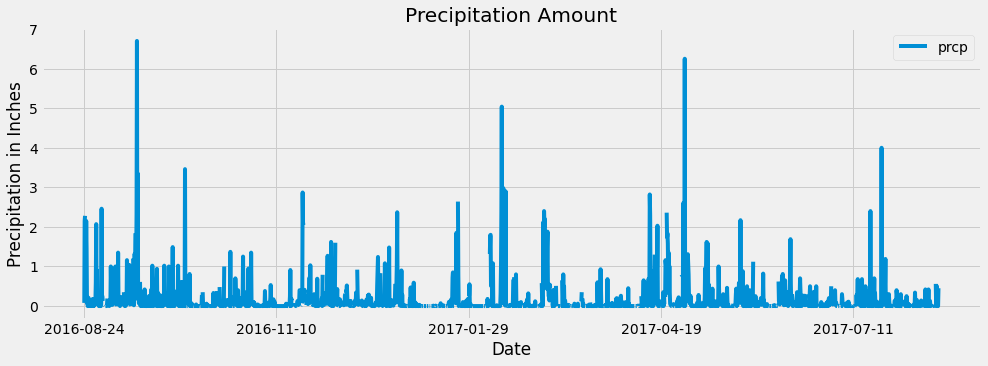

In [11]:
# Perform a query to retrieve the data and precipitation scores
precip_scores = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).statement

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.read_sql_query(precip_scores, session.bind)
df.set_index('date', inplace = True)

# Sort the dataframe by date
sorted_df = df.sort_values('date', ascending=True)
# Use Pandas Plotting with Matplotlib to plot the data
sorted_df.plot(y='prcp', use_index=True, figsize=(15,5))
plt.title('Precipitation Amount')
plt.xlabel('Date')
plt.ylabel('Precipitation in Inches')
plt.savefig('Output_data/pricipitation.png')

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
total_station = session.query(Station.name).count()
print(f'There are {total_station} total stations.')

There are 9 total stations.


In [17]:
base.classes.keys()

['measurement', 'station']

In [23]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
# sel = [Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs, Station.station, Station.name]
station_count = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

for station in station_count:
    print(station[0], station[1])
        

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [26]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
stats_min = session.query(func.min(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

stats_max = session.query(func.max(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

stats_avg = session.query(func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

print(f' Station USC00519281 minimun tempurature is {stats_min}')
print(f' Station USC00519281 maximum tempurature is {stats_max}')
print(f' Station USC00519281 average tempurature is {stats_avg}')

 Station USC00519281 minimun tempurature is [(54.0,)]
 Station USC00519281 maximum tempurature is [(85.0,)]
 Station USC00519281 average tempurature is [(71.66378066378067,)]


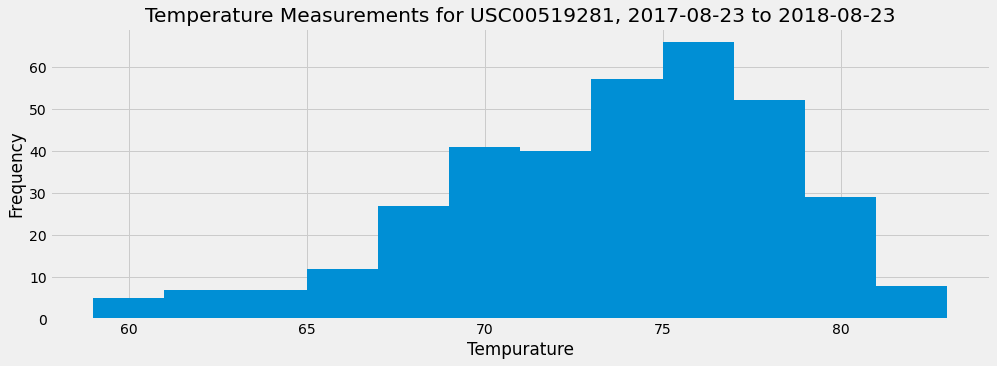

In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
top_tobs = session.query(Measurement.tobs).\
    filter(Measurement.date > '2016-08-23').\
    filter(Measurement.station == 'USC00519281').order_by(Measurement.date).statement

# Make dataframe
df_top_tobs = pd.read_sql_query(top_tobs, session.bind)

#Create histogram
top_tobs_hist = df_top_tobs.hist(bins=12, figsize=(15,5))
plt.title('Temperature Measurements for USC00519281, 2017-08-23 to 2018-08-23')
plt.xlabel('Tempurature')
plt.ylabel('Frequency')
plt.savefig('Output_data/top_station_temp.png')

# Close session

In [33]:
# Close Session
session.close()